<a href="https://colab.research.google.com/github/jimmymarcelino/Natural-Languange-Processing/blob/main/Sentiment_Analysis_Using_Twitter_Kaggle_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Akses Data di Google Drive

Mount Google Drive ke Colab. (Jika anda menggunakan VSCode atau Jupyter Notebook mungkin caranya agak berbeda)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_data = 'drive/My Drive'
# path_to_data = 'drive/My Drive/Colab/Data'

Using pandas to read the csv twitter sentiment data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(path_to_data + '/twitter_training.csv')
data

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


# Data Cleaning

I deleted the Id and entity columns because i dont need those column in this sentiment analysis

In [ ]:
data = pd.DataFrame.drop(data, columns=['id', 'entity'])
data

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


Check if there's any empty data (NaN) and delete it if there is any empty data.

In [ ]:
pd.DataFrame.isna(data).sum()

sentiment      0
text         686
dtype: int64

In [ ]:
data = pd.DataFrame.dropna(data, axis=0)
data

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


# Bag of Words Representation


Using Count Vectorizer to transform the texts into vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer().fit(data['text'])
bag_of_words = vectorizer.transform(data['text'])

# Naive Bayes Classifier

Use the bag-of-words representation as features (x_train) and the sentiment column in the data as the label (y_train).

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
x_train = bag_of_words
y_train = data['sentiment']

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
test_data1 = pd.DataFrame(['Happy to be back doing what I love :))'], columns = ['text'])
x_test1 = vectorizer.transform(test_data1['text'])
prediction = nb.predict(x_test1)
prediction_probability = nb.predict_proba(x_test1)
print(prediction_probability)
print(prediction)
test_data2 = pd.DataFrame(['Oh dear god my computer is gonna get fried from all this'], columns = ['text'])
x_test2 = vectorizer.transform(test_data2['text'])
prediction = nb.predict(x_test2)
prediction_probability = nb.predict_proba(x_test2)
print(prediction_probability)
print(prediction)

[[0.10352164 0.02100037 0.02546008 0.85001792]]
['Positive']
[[1.63634348e-02 9.10974381e-01 2.74895018e-04 7.23872895e-02]]
['Negative']


# Naive Bayes Model Evaluation




In [ ]:
test_data = pd.read_csv(path_to_data + '/twitter_validation.csv')
test_data

,id,entity,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
test_data = pd.DataFrame.drop(test_data, columns=['id', 'entity'])
test_data

,sentiment,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
test_data = pd.DataFrame.dropna(test_data, axis=0)

In [ ]:
pd.DataFrame.isna(test_data).sum()

sentiment    0
text         0
dtype: int64

Using the same vectorizer to transform the validation data

In [ ]:
test_bag_of_words = vectorizer.transform(test_data['text'])
x_test = test_bag_of_words
y_test = test_data['sentiment']

Makes a prediction towards the data test using the model that have been created. After that, plot the confusion matrix and classsification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

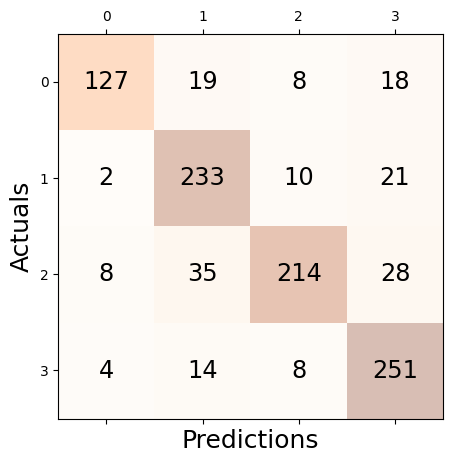

              precision    recall  f1-score   support

  Irrelevant       0.90      0.74      0.81       172
    Negative       0.77      0.88      0.82       266
     Neutral       0.89      0.75      0.82       285
    Positive       0.79      0.91      0.84       277

    accuracy                           0.82      1000
   macro avg       0.84      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



In [ ]:
y_pred = nb.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_test1 = vectorizer.transform(test_data1['text'])
prediction = lg.predict(x_test1)
prediction_probability = lg.predict_proba(x_test1)
print(prediction_probability)
print(prediction)
test_data2 = pd.DataFrame(['Oh dear god my computer is gonna get fried from all this'], columns = ['text'])
x_test2 = vectorizer.transform(test_data2['text'])
prediction = lg.predict(x_test2)
prediction_probability = lg.predict_proba(x_test2)
print(prediction_probability)
print(prediction)

[[0.16601315 0.01854726 0.0643997  0.75103988]]
['Positive']
[[0.16775958 0.77690078 0.00356021 0.05177943]]
['Negative']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

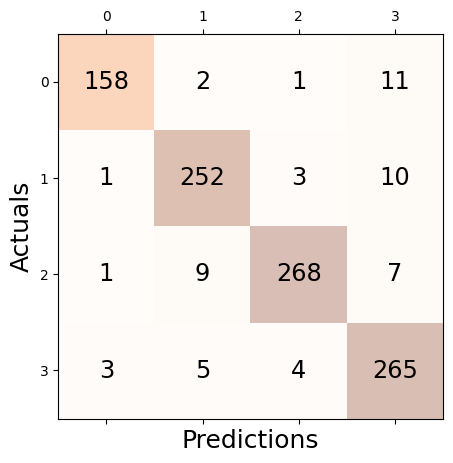

              precision    recall  f1-score   support

  Irrelevant       0.97      0.92      0.94       172
    Negative       0.94      0.95      0.94       266
     Neutral       0.97      0.94      0.96       285
    Positive       0.90      0.96      0.93       277

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
y_pred = lg.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

#SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False), SGDClassifier(loss = 'log_loss' , max_iter=1000, tol=1e-3))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('sgdclassifier', SGDClassifier(loss='log_loss'))])

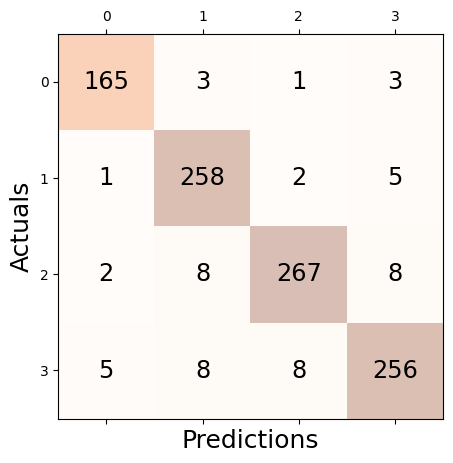

              precision    recall  f1-score   support

  Irrelevant       0.95      0.96      0.96       172
    Negative       0.93      0.97      0.95       266
     Neutral       0.96      0.94      0.95       285
    Positive       0.94      0.92      0.93       277

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [ ]:
y_pred = clf.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
sgd = SGDClassifier(loss = 'log_loss', early_stopping = True, max_iter=1000)
sgd.fit(x_train, y_train)

SGDClassifier(early_stopping=True, loss='log_loss')

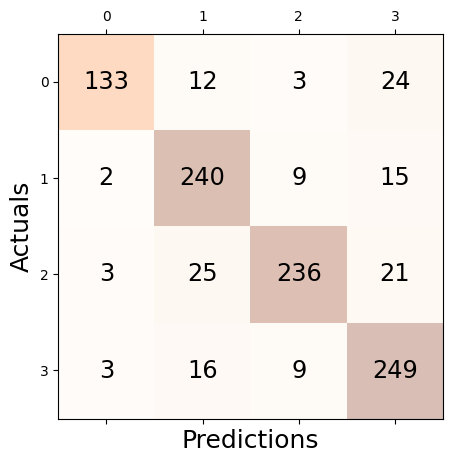

              precision    recall  f1-score   support

  Irrelevant       0.94      0.77      0.85       172
    Negative       0.82      0.90      0.86       266
     Neutral       0.92      0.83      0.87       285
    Positive       0.81      0.90      0.85       277

    accuracy                           0.86      1000
   macro avg       0.87      0.85      0.86      1000
weighted avg       0.87      0.86      0.86      1000



In [ ]:
y_pred = sgd.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))